In [4]:
import scienceplots
import matplotlib.pyplot as plt
import numpy as np
from lmfit import Model

from blume.process import read, compute
from blume.run import new_folder, save, sweep_T
from blume.model.post_props import Prop

plt.style.use("science")
plt.rcParams["text.usetex"] = True

In [20]:
chi_range = range(1, 15)
dir = new_folder()

T_c = 2 / np.log(1 + np.sqrt(2))
T_range = [T_c for _ in range(10)]
for chi in chi_range:
    data = sweep_T(
        chi=chi,
        T_range=T_range,
        tol=1e-9,
        max_steps=int(10e8),
        use_prev=False,
    )
    save(data, dir)

chi = 1: 100%|██████████| 10/10 [00:00<00:00, 574.32it/s]


Saving data in folder: '24-04 16:18'
Done 



chi = 2: 100%|██████████| 10/10 [00:01<00:00,  7.77it/s]


Saving data in folder: '24-04 16:18'
Done 



chi = 3: 100%|██████████| 10/10 [00:01<00:00,  5.11it/s]


Saving data in folder: '24-04 16:18'
Done 



chi = 4: 100%|██████████| 10/10 [00:05<00:00,  1.84it/s]


Saving data in folder: '24-04 16:18'
Done 



chi = 5: 100%|██████████| 10/10 [00:08<00:00,  1.24it/s]


Saving data in folder: '24-04 16:18'
Done 



chi = 6: 100%|██████████| 10/10 [00:13<00:00,  1.32s/it]


Saving data in folder: '24-04 16:18'
Done 



chi = 7: 100%|██████████| 10/10 [00:18<00:00,  1.90s/it]


Saving data in folder: '24-04 16:18'
Done 



chi = 8: 100%|██████████| 10/10 [00:23<00:00,  2.33s/it]


Saving data in folder: '24-04 16:18'
Done 



chi = 9: 100%|██████████| 10/10 [00:29<00:00,  2.94s/it]


Saving data in folder: '24-04 16:18'
Done 



chi = 10: 100%|██████████| 10/10 [00:51<00:00,  5.12s/it]


Saving data in folder: '24-04 16:18'
Done 



chi = 11: 100%|██████████| 10/10 [01:04<00:00,  6.43s/it]


Saving data in folder: '24-04 16:18'
Done 



chi = 12: 100%|██████████| 10/10 [01:06<00:00,  6.68s/it]


Saving data in folder: '24-04 16:18'
Done 



chi = 13: 100%|██████████| 10/10 [01:21<00:00,  8.19s/it]


Saving data in folder: '24-04 16:18'
Done 



chi = 14: 100%|██████████| 10/10 [01:31<00:00,  9.14s/it]

Saving data in folder: '24-04 16:18'
Done 



## Finite $\chi$ critical exponents

In [7]:
mean_mags, mean_xis, errors = [], [], []
dir = "24-04 16:18"
for chi in range(2, 15):
    data = read(folder=dir, val=chi)
    mags = compute(Prop.m, data)
    corrs = compute(Prop.xi, data)

    mean_xis.append(np.mean(corrs))
    mean_mags.append(np.mean(mags))
    errors.append(np.std(mags))

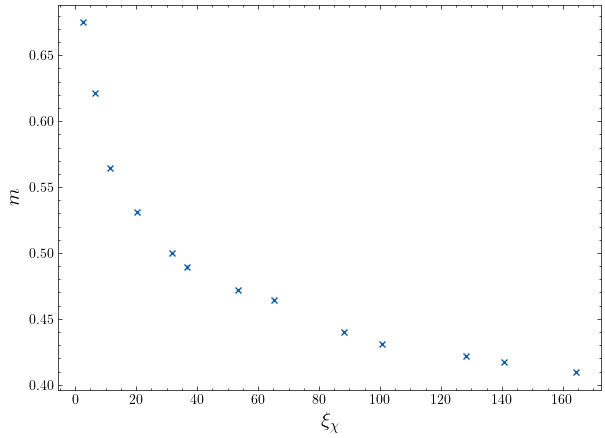

In [8]:
plt.figure(figsize=(7, 5))
plt.errorbar(mean_xis, mean_mags, yerr = errors, fmt = "x", markersize=5)
plt.xlabel(r"$\xi_{\chi}$", fontsize=15)
plt.ylabel("$m$", fontsize=15)
plt.savefig(f"data/{dir}/critical")

[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 82
    # data points      = 13
    # variables        = 3
    chi-square         = 2.1636e-04
    reduced chi-square = 2.1636e-05
    Akaike info crit   = -137.045943
    Bayesian info crit = -135.351095
    R-squared          = 0.99735278
[[Variables]]
    a:  0.10012908 +/- 0.02684699 (26.81%) (init = 0.5)
    b: -0.11851101 +/- 0.17246928 (145.53%) (init = 0.5)
    c:  0.87761794 +/- 0.16456495 (18.75%) (init = 0.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(b, c) = -0.9996
    C(a, b) = +0.9983
    C(a, c) = -0.9962


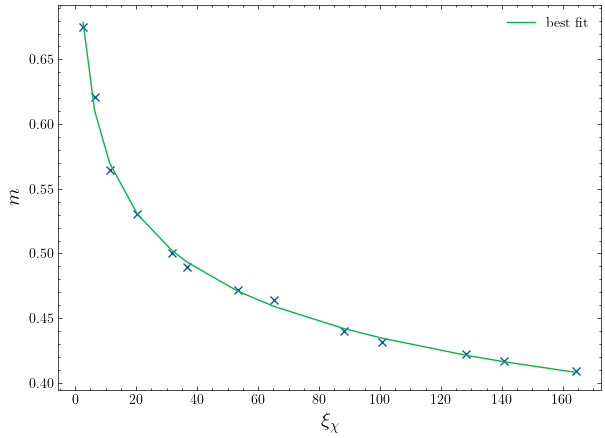

In [76]:
model = Model(lambda x, a, b, c: c*x**(-a)+b)

x, y = mean_xis, mean_mags

params = model.make_params(a=0.5, b=0.5, c=0.5)
result = model.fit(y, params, x=x)

print(result.fit_report())

plt.figure(figsize= (7, 5))
plt.plot(x, y, 'x')
plt.plot(x, result.best_fit, '-', label='best fit')
plt.xlabel(r"$\xi_{\chi}$", fontsize=15)
plt.ylabel("$m$", fontsize=15)
plt.legend()
plt.show()

In [74]:
print(f"Obtained crit. exp.: {result.params['a'].value} +/- {result.params['a'].stderr}")
print(f"exact crit. exp.: {1/8}")

Obtained crit. exp.: 0.1001290780506649 +/- 0.026846993764929425
exact crit. exp.: 0.125


## Log transformation

In [61]:
log_xis = [np.log(xi) for xi in mean_xis]
log_mags = [np.log(m) for m in mean_mags]
log_errors = [m / err for (err, m) in zip(errors, mean_mags)]

[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 13
    # variables        = 2
    chi-square         = 7.3609e-04
    reduced chi-square = 6.6917e-05
    Akaike info crit   = -123.128421
    Bayesian info crit = -121.998523
    R-squared          = 0.99753276
[[Variables]]
    a:  0.12309250 +/- 0.00184577 (1.50%) (init = 0.5)
    b: -0.26536920 +/- 0.00711069 (2.68%) (init = 0.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = +0.9477


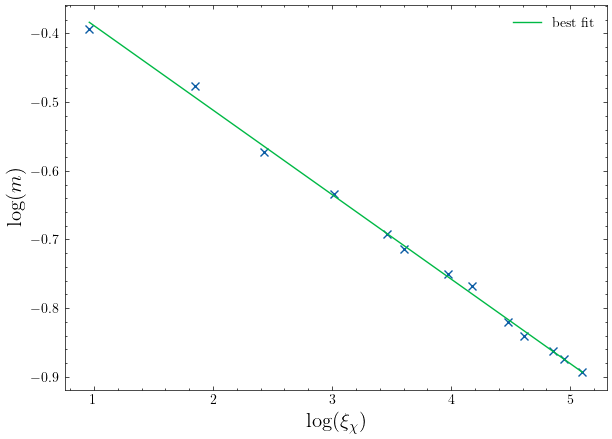

In [62]:
model = Model(lambda x, a, b: -a*x+b)

x, y = log_xis, log_mags

params = model.make_params(a=0.5, b=0.5)
result = model.fit(y, params, x=x)

print(result.fit_report())

plt.figure(figsize= (7, 5))
plt.plot(x, y, 'x')
plt.plot(x, result.best_fit, '-', label='best fit')
plt.xlabel(r"$\log(\xi_{\chi})$", fontsize=15)
plt.ylabel("$\log(m)$", fontsize=15)
plt.legend()
plt.show()

In [63]:
print(f"Obtained crit. exp.: {result.params['a'].value} +/- {result.params['a'].stderr}")
print(f"exact crit. exp.: {1/8}")

Obtained crit. exp.: 0.12309249957681986 +/- 0.0018457678294802563
exact crit. exp.: 0.125
